# <p style="color:red">Project Business Statistics: E-news Express</p>

**Marks: 60**

## Description Background: 

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

## Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected to perform the statistical analysis to answer the following questions:

Explore the dataset and extract insights using Exploratory Data Analysis.
Do the users spend more time on the new landing page than the old landing page?
Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
Does the converted status depend on the preferred language? [Hint: Create a contingency table using the pandas.crosstab() function]
Is the mean time spent on the new page same for the different language users?
*Consider a significance level of 0.05 for all tests.

## <a name='contents'>**Contents of Analysis:**<a>

- <a href = #link1>1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)</a>
- <a href = #link2>2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)</a>
- <a href = #link3>3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)</a>
- <a href = #link4>4. Is the conversion and preferred language are independent or related? (10 Marks)</a>
- <a href = #link5>5. Is the time spent on the new page same for the different language users? (10 Marks)</a>

### Import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import seaborn as sns

## <a name='link1'>1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)</a>

or return to <a href = #contents>Contents of Analysis</a>
    

### Exploratory Data Analysis - Step by step approach
Typical Data exploration activity consists of the following steps:
    
1. Importing Data
2. Variable Identification
3. Variable Transformation/Feature Creation
4. Missing value detection
5. Univariate Analysis
6. Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# Importing our data from the "abtest.csv" file which located in the same folder as the *.ipynb file. 
# We are using the pd.read_csv() function from pandas and in parenthesis the csv file to upload.
df = pd.read_csv('abtest.csv')

### Data Overview
- View a few rows of the data frame.
- Check the shape and data types of the data frame.
- Fix the data-types (if needed).
- Missing Value Check.
- Summary statistics from the data frame.

In [3]:
# Sampling the first 5 rows from our df Dataframe
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


### Data Dictionary:

- user_id - This represents the user ID of the person visiting the website.

- group - This represents whether the user belongs to the first group (control) or the second group (treatment).

- landing_page - This represents whether the landing page is new or old.

- time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.

- converted - This represents whether the user gets converted to a subscriber of the news portal or not.

- language_preferred - This represents the language chosen by the user to view the landing page.

In [4]:
# Calculating the number of raws and columns in our Dataset
print('The upper table consists of ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns.')

The upper table consists of 100 rows and 6 columns.


In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [6]:
#Converting "objects" to "category" reduces the data space required to store the dataframe
df['group'] = df['group'].astype('category')
df['landing_page'] = df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

In [7]:
# for confirmation we run again the .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


In [8]:
# Finding missing values in the table
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [9]:
#*.describe() show us all the min-max-mean-median-quartial values 
## as well as the number of entries from the numerical columns.
# Although user_id is an integer it doesn't contain relevant informations. We exclude it from the analysis.
df.time_spent_on_the_page.describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64

In [10]:
# Some more categorization with value_counts that will be usefull for aour further analysis.
# Here we have the 2 options of column 'group'. 
df.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [11]:
# Here we have the 2 options of column 'landing_page'. 
df.landing_page.value_counts()

new    50
old    50
Name: landing_page, dtype: int64

In [12]:
# The number of convertions . 
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [13]:
# The count of variates from preferred languages
df.language_preferred.value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

### Observations

- As we can see from this analysis we have a 100 users or entries and aparts from 6 features (columns). 
- No missing values at this Dataframe.
- 4 categorical columns and 2 numeric (<i>in our case user_id not very relevant</i>).
- Percentage of users that landed at new page are 50% the same as at the old one.
- The number of convertion is little bit more higher as they are 54 in contrast with the 46 that they didn't.
- We have 3 languages in almost at same numbers of preference.



### Univariate Analysis

In [14]:
# Function to plot a boxplot and a histogram along the same scale. 
# Run this chunk of code to define this function - this will be very useful in data visualisation.
# *** Copied from the Mentorship Case Studies in the past. ***

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots
# *** Copied from the Mentorship Case Studies in the past. ***


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=45, fontsize=15, horizontalalignment='right')
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

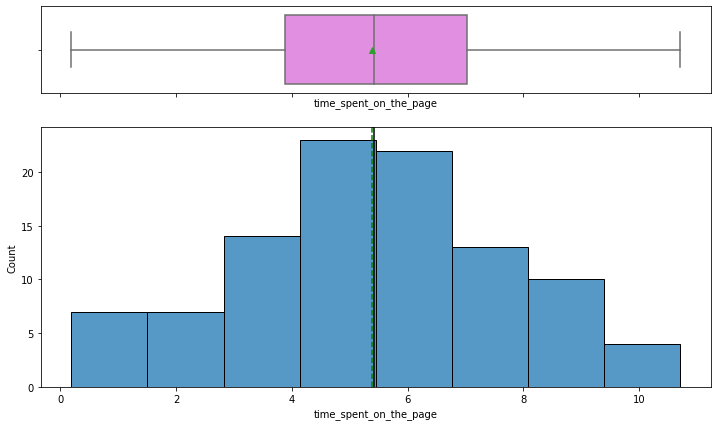

In [16]:
# A boxplot by calling the defined function histogram_boxplot().
# Except the number of users that they spent this particular time range 8 Boxes y axis, we finding also here the median and the mean values of this column.
histogram_boxplot(df,"time_spent_on_the_page")

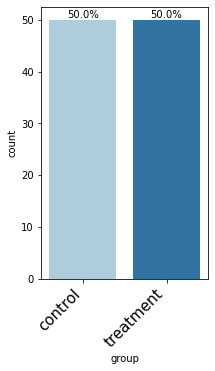

In [17]:
# A visualization with barplot to see the percentage of two groups and their number of users as well
labeled_barplot(df,'group',perc = True)

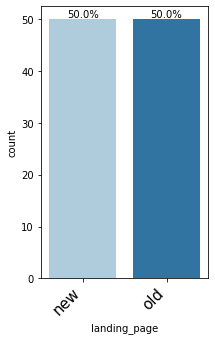

In [18]:
# A visualization with barplot to see the percentage of the two variants on 'Landing page' and their number of users as well
labeled_barplot(df,'landing_page',perc = True)

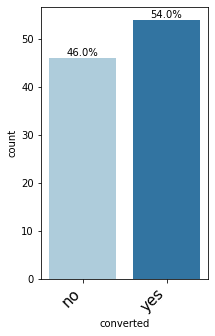

In [19]:
# A visualization with barplot to see the percentage of two convertion options and their number of users as well
labeled_barplot(df,'converted',perc = True)

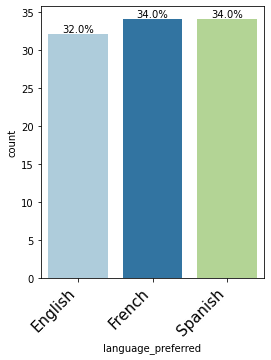

In [20]:
# A visualization with Barplot to see the percentages of the three preferred languages and their number of users as well
labeled_barplot(df,'language_preferred',perc = True)

### Bivariate Analysis

#### Landing page Vs Time spent on the page

<Figure size 648x648 with 0 Axes>

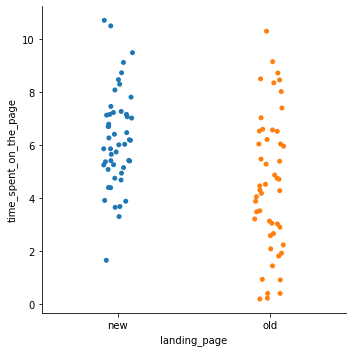

In [21]:
# An analysis with catplot about the diaspora of the count of the time users spent on a particular page. 
plt.figure(figsize=(9, 9))
sns.catplot(data = df, x = 'landing_page', y = 'time_spent_on_the_page', )
plt.show()

#### Conversion status Vs Time spent on the page

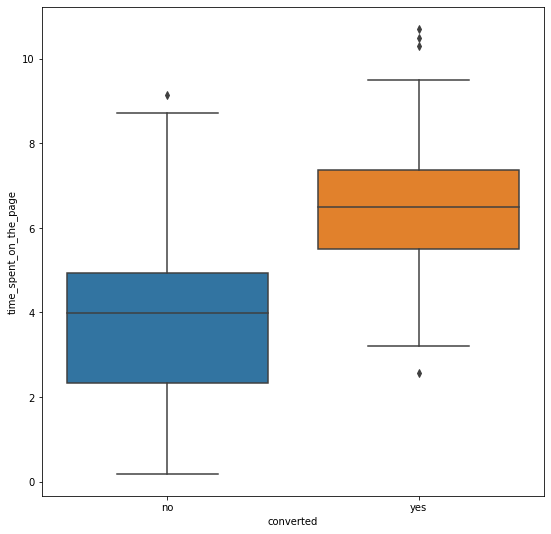

In [22]:
# A catplot between the count of the time users spent on the page, categorized according convertion options.
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, y = 'time_spent_on_the_page', x = 'converted')
plt.show()

#### Language prefered Vs Time spent on the page

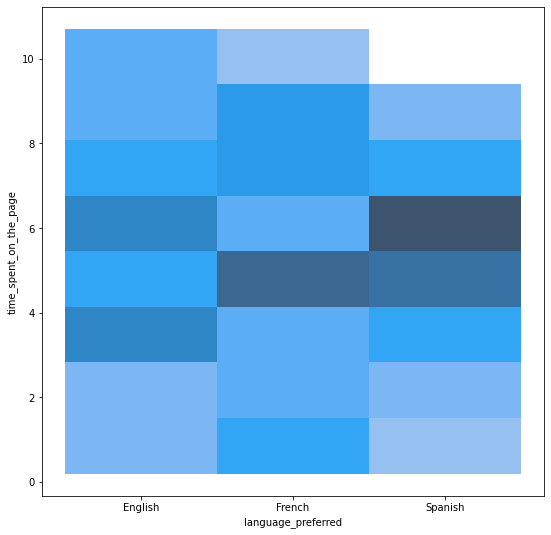

In [23]:
# A different one showing with its darkness the number of users at the time they spent on the page, categorized according the language preference.
plt.figure(figsize=(9, 9))
sns.histplot(data = df, y = 'time_spent_on_the_page', x = 'language_preferred')
plt.show()

## <a name='link2'>2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)</a>

or return to <a href = #contents>Contents of Analysis</a>

### Perform Visual Analysis

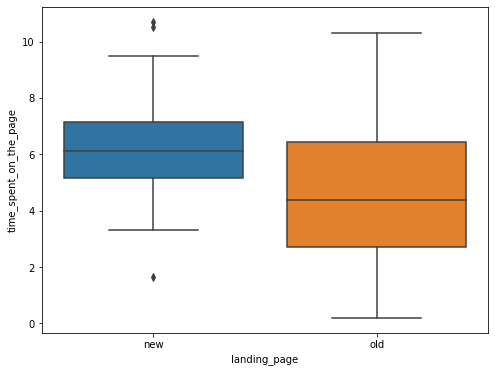

In [24]:
# We are plotting with seaborn a boxplot for a categorical and a nummeric column. 
# On X  we have the two options of landing_page (New- Old), on Y the time users spent on each from the dataset df.
# We can keep from this visualization the difference in the mean value on both groups.
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses

<u>Null Hypothesis.</u>

$H_0:$ Users on new spent the same time as the users on old.


<u> Alternative  Hypothesis.</u>

$H_a:$Users on new spent more time than the users on old.


 - $\mu_1$ = we defining the mean value of the users spenting time at the old site

 - $\mu_2$ = we defining the mean value of the users spenting time at the new site



>$H_0: \mu_1 = \mu_2 $

>$H_a: \mu_1 < \mu_2 $

### Step 2: Select Appropriate test

•	This is a one-tailed test concerning two population means from two independent populations.

•	The population standard deviations are unknown.

•	Continuous data.

•	Independent populations

•	Not paired T-Test there are not related polpulations.


It seems here to have a <b>two Independent Sample T-test</b>

### Step 3: Decide the significance level

As requested, we considering the <b>Significance Level</b> at it's default value 

$a$ = 0.05

In [25]:
a = 0.05

### Step 4: Collect and prepare data

In [26]:
# Define a variable by extracting the criteria for my  search.
# In this case by finding all the times that user spent on the old page.
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']
# In this case by finding all the times that user spent on the new page.
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Reseting on both their existing indexes
time_spent_old = time_spent_old.reset_index()
time_spent_new = time_spent_new.reset_index()

# and then drop their new
time_spent_old = time_spent_old.drop(columns=['index'])
time_spent_new = time_spent_new.drop(columns=['index'])

# we merge in a new variable the two DataFrames
times = pd.merge(time_spent_old, time_spent_new, right_index = True, left_index = True)
# and we rename the columns to make it easier ! 
times = times.rename(columns={"time_spent_on_the_page_x": "old_time", "time_spent_on_the_page_y": "new_time"})

# instead of .head() i use a .sample() by giving the number of samples that i need.
times.sample(4) 

,old_time,new_time
17,4.52,7.16
26,0.22,6.41
41,1.44,3.68
10,3.88,7.02


In [27]:
# some stats from our new table
times.describe()

,old_time,new_time
count,50.000000,50.000000
mean,4.532400,6.223200
std,2.581975,1.817031
min,0.190000,1.650000
25%,2.720000,5.175000
50%,4.380000,6.105000
75%,6.442500,7.160000
max,10.300000,10.710000


In [28]:
# Accordingly we calculate now the standard deviation of each group 
# by rounding the after comma position to two digits on the right after 0. 

print('Standard deviation for the time spent on the old page is:', round(times.old_time.std(),2))
print('Standard deviation for the time spent on the new page is:', round(times.new_time.std(),2))
print('\n') # just to add an empty line between the two group of results 
print('Mean for the time spent on the old page is:', round(times.old_time.mean(),2))
print('Mean for the time spent on the new page is:', round(times.new_time.mean(),2))

Standard deviation for the time spent on the old page is: 2.58
Standard deviation for the time spent on the new page is: 1.82


Mean for the time spent on the old page is: 4.53
Mean for the time spent on the new page is: 6.22


### Step 5: Calculate the p-value

In [29]:
#import the required functions for two independent sample T-test with equality of means and unequal Std deviation from scipy.stats.
from scipy.stats import ttest_ind

# Calculating the p-value, "equal_var" set to  "False" for the unequal Std. Devs. 
# Alternative='greater' as we want to find in our hypothesis that the new landing site is greater than the older. 
test_stat_2, p_value_2 = ttest_ind(times['new_time'], times['old_time'], equal_var = False, alternative = 'greater')

# We include in our print a variable by converting it in string as below between '+' symbols if it is between the text.
print('The p-value is : ' +str(p_value_2))

The p-value is : 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [30]:
# print the conclusion based on p-value
if p_value_2 < 0.05:
    print('P_Value is less than the Significant Level α. \n' +str(p_value_2)+ ' < ' +str(a)+'\n\n*** We reject the null hypothesis. ***')
else:
    print('P_Value is greater than the Significant Level α.\n' +str(p_value_2)+ ' < ' +str(a)+'\n\n*** We fail to reject the null hypothesis. ***')

P_Value is less than the Significant Level α. 
0.0001392381225166549 < 0.05

*** We reject the null hypothesis. ***


### Step 7:  Draw inference

With a p-value less than the significance level, we reject the null hypothesis. We have enough statistical evidence to say that the user spenting more time at the new page rather than at the old.

## <a name = 'link3'>3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)</a>

or return to <a href = #contents>Contents of Analysis</a>

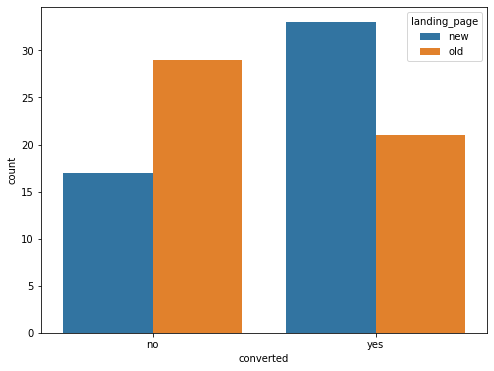

In [31]:
# We are plotting this time on X the converted values sorting by new or old from landing_page. Y is the count of them.
# We are mostly intrested about the right part of the visualization the 'Yes' side of the diagram.
plt.figure(figsize=(8,6))
sns.countplot(x = 'converted',hue= 'landing_page', data = df)
plt.show()

### Step 1: Define the null and alternate hypotheses


<u>Null Hypothesis.</u>

$H_0:$  Proportion of converted users is equal on old side and on new.

<u>Alternative  Hypothesis.</u>

$H_a:$  Proportion of converted users is less on old side rather than on new.



- $p_0$ = proportion of users on old side that converted

- $p_1$ = proportion of users on new side that converted



>$H_0: p_0 = p_1 $

>$H_a: p_0 < p_1 $

### Step 2: Select Appropriate test

We obtain that we have at this point a <b>Two proportion Z-test</b> because of the following reasons.

 - Binomally distributed population.

 - Random sampling from the population.

 - Can the binomial distribution approximated to normal distribution, np and n(1-p) are greater than or equal to 10. 

Here, n and p refer to the sample size and sample proportion respectively.


* $𝑛𝑝_1$=50 * (21 / 50) = 21 ≥ 10

* 𝑛(1−$𝑝_1$)=50 * ((50 − 21) / 50) = 29 ≥ 10

* $𝑛𝑝_2$=50 * (33 / 50) = 33 ≥ 10

* 𝑛(1−$𝑝_2$)=50 * ((50 − 33) / 50) = 17 ≥ 10

### Step 3: Decide the significance level

As requested, we considering the <b>Significance Level</b> at it's default value 

$a$ = 0.05

In [32]:
a = 0.05

### Step 4: Collect and prepare data

In [33]:
# With crosstab() function from pandas we combining the count of values of the two desire columns.
# We set an additionaly column & row 'Total' for calculate accordingly the total number of each column and each row. 
cov = pd.crosstab(df.group, df.converted, margins=True, margins_name="Total")
display(cov)

converted,no,yes,Total
group,,,
control,29,21,50
treatment,17,33,50
Total,46,54,100


In [34]:
# We printing the willing values by targeting and using the .iloc[x,y position of the number] starting always from 0.  
print('Total number of users that landed on the old page: ' +str(cov.iloc[0, 2]))
print('Total number of users that landed on the old page: ' +str(cov.iloc[1, 2]))
print('\n') # just to add an empty line between the two group of results 
print('Total number of not converted from both groups - "No": '+str(cov.iloc[2, 0]))
print('Total number of convertions from both groups - "Yes" : '+str(cov.iloc[2, 1]))

Total number of users that landed on the old page: 50
Total number of users that landed on the old page: 50


Total number of not converted from both groups - "No": 46
Total number of convertions from both groups - "Yes" : 54


### Step 5: Calculate the p-value

In [57]:
# import the required function for a two proportion Z-test 
from statsmodels.stats.proportion import proportions_ztest   

# set the numbers of converted people for each group. First position for the old(control) and second for the new(treatment)
per_yes = np.array([cov.iloc[0, 1], cov.iloc[1, 1]])

# set the sample sizes for each group as we defined also upper
totals = np.array([cov.iloc[0, 2], cov.iloc[1, 2]])

# calculationg the p-value
test_stat_3, p_value_3 = proportions_ztest(per_yes, totals, alternative = 'smaller')
print('The p-value is ' + str(p_value_3))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [53]:
# print the conclusion based on p-value
if p_value_3 < 0.05:
    print('P_Value is less than the Significant Level α. \n' +str(p_value_3)+ ' < ' +str(a)+'\n\n*** We reject the null hypothesis. ***')
else:
    print('P_Value is greater than the Significant Level α.\n' +str(p_value_3)+ ' < ' +str(a)+'\n\n*** We fail to reject the null hypothesis. ***')

P_Value is less than the Significant Level α. 
0.008026308204056278 < 0.05

*** We reject the null hypothesis. ***


### Step 7:  Draw inference

At 5% significance level, we reject the null hypothesis. We have enough statistical evidence to say that the proportion of users who visit the landing page get more converted than those they landing at the old.

## <a name = 'link4'>4. Is the conversion and preferred language are independent or related? (10 Marks)</a>
or return to <a href = #contents>Contents of Analysis</a>

### Perform Visual Analysis

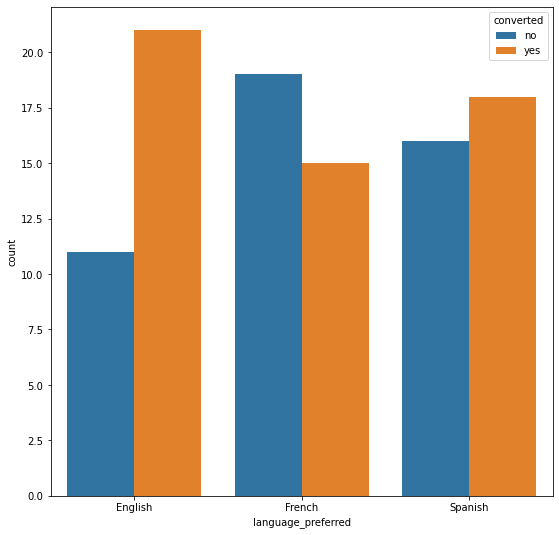

In [37]:
# A Countplot visualization of number of preferred languages per convertion type
plt.figure(figsize=(9, 9))
sns.countplot(data = df, hue = 'converted', x = 'language_preferred')
plt.show()

### Step 1: Define the null and alternate hypotheses

We will test the null hypothesis

>$H_0:$ Converted status is independent of Preferred Language.

against the alternate hypothesis

>$H_a:$ Converted status depends on Preferred Language.



### Step 2: Select Appropriate test

- Categorical variables - Yes

- Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.

- Random sampling from the population - Yes.

### Step 3: Decide the significance level

As requested, we considering the <b>Significance Level</b> at it's default value 

$a$ = 0.05

In [38]:
a = 0.05

### Step 4: Collect and prepare data

In [39]:
# Create the contingency table of the two categorical variables
convi = pd.crosstab(df.language_preferred, df.converted)
convi.reset_index()
convi

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [40]:
# import the required functions for the Chi-Square Test of Independence from scipy.stats.
from scipy.stats import chi2_contingency  

# Calculating the p-value
chi2, p_value_4, dof, exp_freq = chi2_contingency(convi)

print('The p-value is', p_value_4)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with α

In [41]:
if p_value_4 < 0.05:
    print('P_Value is less than the Significant Level α. \n' +str(p_value_4)+ ' < ' +str(a)+'\n\n*** We reject the null hypothesis. ***')
else:
    print('P_Value is greater than the Significant Level α.\n' +str(p_value_4)+ ' < ' +str(a)+'\n\n*** We fail to reject the null hypothesis. ***')

P_Value is greater than the Significant Level α.
0.2129888748754345 < 0.05

*** We fail to reject the null hypothesis. ***


### Step 7: Draw inference

At 5% significance level, we fail to reject the null hypothesis. We do not have enough statistical evidence to say that convertion depends on preferred language.

## <a name = 'link5'>5. Is the time spent on the new page same for the different language users? (10 Marks)</a>
or return to <a href = #contents>Contents of Analysis</a>

### Perform Visual Analysis

In [42]:
df_new = df[df['landing_page'] == 'new']
df_new.language_preferred.value_counts()

French     17
Spanish    17
English    16
Name: language_preferred, dtype: int64

In [43]:
print(df_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


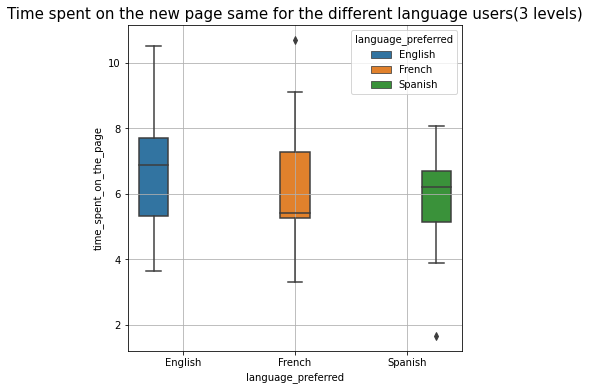

In [44]:
fig, ax = plt.subplots(figsize = (6,6))
a = sns.boxplot(x= "language_preferred", y = 'time_spent_on_the_page' , data = df_new, hue = 'language_preferred')
a.set_title("Time spent on the new page same for the different language users(3 levels)", fontsize=15)
plt.grid()
plt.show()

As we can observe the distribution differs among the three groups.

Although 'English' having the highest value of all three.

### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on new webside for different languages English, French, Spanish respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one value is different from the rest.


### Step 2: Select Appropriate test

This is a problem, concerning three population means. <b>One-way ANOVA</b> could be the appropriate test here provided normality and equality of variance assumptions are verified.

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene test is applied to the response variable.


### Shapiro-Wilk’s test

We will test the null hypothesis

>$H_0:$ The time follow a normal distribution

against the alternative hypothesis

>$H_a:$ The time does not not follow a normal distribution

In [45]:
# Assumption 1: Normality
# import the required function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


Since p-value is greater than the 5% significance level, we fail to reject the null hypothesis that the response follows the normal distribution.

### Levene’s test

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest


In [46]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large than the 5% significance level, we fail to reject the null hypothesis of homogeneity of variances.

### Step 3: Decide the significance level

As requested, we considering the <b>Significance Level</b> at it's default value 

$a$ = 0.05

In [47]:
a = 0.05

### Step 4: Collect and prepare data

In [48]:
# create a subsetted data frame of the time spent on the new page by English language users 
time_English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']
# create subsetted data frames of the time spent on the new page by French and Spanish language users
time_French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']
time_Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [49]:
# complete the code to import the required function
from scipy.stats import f_oneway 

# write the code to calculate the p-value
test_stat, p_value_5 = f_oneway(time_English,
                              time_French,
                              time_Spanish)


print('The p-value is', p_value_5)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with α

In [50]:
if p_value_5 < 0.05:
    print('P_Value is less than the Significant Level α. \n' +str(p_value_5)+ ' < ' +str(a)+'\n\n*** We reject the null hypothesis. ***')
else:
    print('P_Value is greater than the Significant Level α.\n' +str(p_value_5)+ ' < ' +str(a)+'\n\n*** We fail to reject the null hypothesis. ***')

P_Value is greater than the Significant Level α.
0.43204138694325955 < 0.05

*** We fail to reject the null hypothesis. ***


In [51]:
# importing pairwise_tukeyhsd to compare as pairs the values
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp = pairwise_tukeyhsd(endog = df_new['time_spent_on_the_page'], groups = df_new['language_preferred'], alpha = 0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
English  French  -0.4673 0.7259 -2.0035  1.069  False
English Spanish  -0.8285  0.401 -2.3647 0.7078  False
 French Spanish  -0.3612  0.816  -1.874 1.1516  False
-----------------------------------------------------


### Step 7: Draw inference

Since p-value of the more than the 5% significance level, we fail to reject the null hypothesis that at least one variant is different.

# Conclusion and Business Recommendations

At this research:

- We collected a sample of 100 pure entries without missing data from every entry.
- We had a symmetry of users that they landed to the old page and those that landed at the new one (50%-50%).
- Although we found out that the percentage of convertion at the new page is greater than at the old one.
- We searched also that the convertion is independent of the language that the user preferred.
- The average time that users from different languages spent on the new website is similar.


As result of our analysis we calculated that the <b>proportion of users</b> that they subscribing using the new website is much greater rather this one from the old one. After our results, we can <b>higly recommend</b> the new website as source  of gathering subscribers more effectively.

